In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:

# Create a simple CNN model
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [14]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=3)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")
print(f"Test Loss:{test_loss}\n\n")
# Make predictions
predictions = model.predict(test_images)



# model summary
model.summary()


Epoch 1/3
1875/1875 [==============================] - 54s 28ms/step - loss: 0.0233 - accuracy: 0.9946
Epoch 2/3
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0196 - accuracy: 0.9953
Epoch 3/3
313/313 [==============================] - 3s 9ms/step - loss: 0.1032 - accuracy: 0.9848
Test accuracy: 0.9847999811172485
Test Loss:0.1032044067978859


313/313 [==============================] - 3s 8ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                           

In [ ]:
!pip install visualkeras

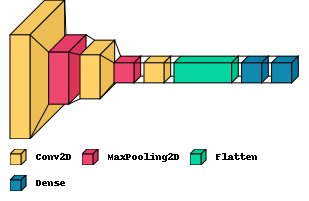

In [15]:
import visualkeras

visualkeras.layered_view(model,legend=True)